# Auto MPG Dataset Using Different Models

The Auto MPG sample data set is a collection of 398 automobile records from 1970 to 1982. It contains attributes like car name, MPG, number of cylinders, horsepower and weight. This is a great sample data set to explore and visualize

# Import Libraries

Importing basic libraries such as numpy, pandas, matplotlib, seaborn and tensorflow

In [ ]:
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importing basic things from tensorflow such as layers, preprocessing

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)
np.set_printoptions(precision= 3, suppress= True)


2.4.0


# Getting the Data

importing dataset from an online machine learning database UCI

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Clyinders','Displacement','Horsepower', 'Weight', 'Acceleration', 'Model Year','Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

Checking the tail of dataset

In [ ]:
dataset= raw_dataset.copy()
dataset.tail()

,MPG,Clyinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


Finding, is there any null value in columns of dataset

In [ ]:
dataset.isna().sum()

MPG             0
Clyinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Dropping the null values from dataset

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

MPG             0
Clyinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Mapping the categories of the Origin column of dataset to countries and get dummies from pandas 

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2 : 'Europe', 3 : 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Clyinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


Separating training and test dataset using some fraction value

In [ ]:
train_dataset = dataset.sample(frac= 0.8, random_state= 0)
test_dataset = dataset.drop(train_dataset.index)


Plotting the training dataset to check the correlation among features

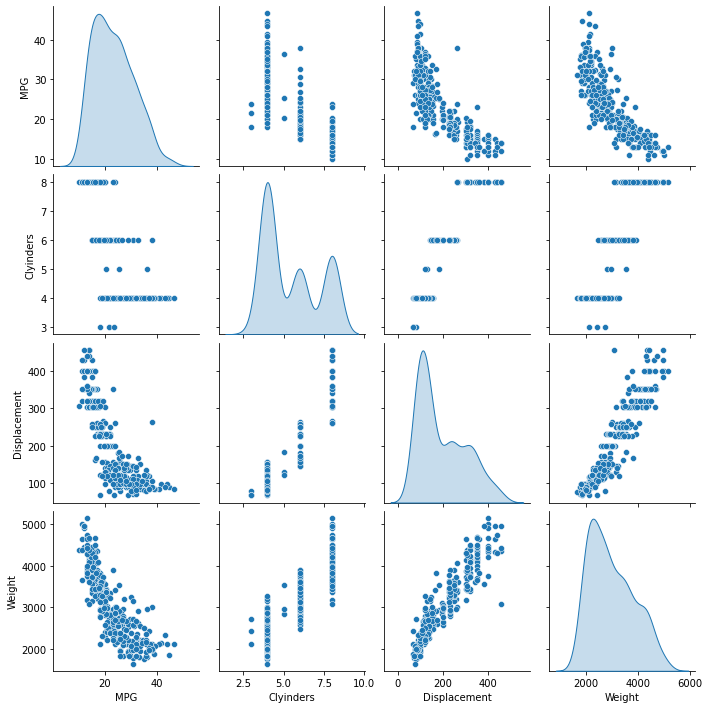

In [ ]:
sns.pairplot(train_dataset[['MPG', 'Clyinders','Displacement','Weight']], diag_kind = 'kde')

Describing the training dataset

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Clyinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


Separating out the train & test features and label

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')


Making an object of normalization and putting it on train featues

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
    0.624]


In [ ]:
first = np.array(train_features[:1])
with np.printoptions(precision = 2, suppress = True):
  print('First Example is: ',first)
  print()
  print('Normalized: ', normalizer(first).numpy())


First Example is:  [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized:  [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


# Training Models

Using only one feature of dataset "Horsepower" and normalizing it

In [ ]:
horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = preprocessing.Normalization(input_shape= [1,])
horsepower_normalizer.adapt(horsepower) 

Defining simple model using normalized feature 'Horsepower' and only dense layer with one unit

In [ ]:
horsepower_model = tf.keras.models.Sequential([
                                               horsepower_normalizer,
                                               layers.Dense(1)
])
horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


Predicting without model training

In [ ]:
horsepower_model.predict(horsepower[:10])

array([[ 0.689],
       [ 0.389],
       [-1.271],
       [ 0.965],
       [ 0.873],
       [ 0.343],
       [ 1.034],
       [ 0.873],
       [ 0.228],
       [ 0.389]], dtype=float32)

Compiling model with Adam optimizer and mean absolute error and fitting on training feature which we used for this model 'Horsepower'

In [ ]:
horsepower_model.compile(optimizer= tf.optimizers.Adam(learning_rate= 0.1), loss = 'mean_absolute_error')

In [ ]:
%%time
history = horsepower_model.fit(train_features['Horsepower'], train_labels, verbose= 0, epochs = 100, validation_split= 0.2)

CPU times: user 8.23 s, sys: 252 ms, total: 8.49 s
Wall time: 8.4 s


Checking the last 5 terms of the train and val loss

In [ ]:
hist = pd.DataFrame(history.history)
hist['epochs'] = history.epoch
hist.tail()

,loss,val_loss,epochs
95,3.802291,4.187860,95
96,3.807580,4.174935,96
97,3.804168,4.188501,97
98,3.802480,4.186445,98
99,3.809440,4.207953,99


Plotting train loss and val loss on same plot

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

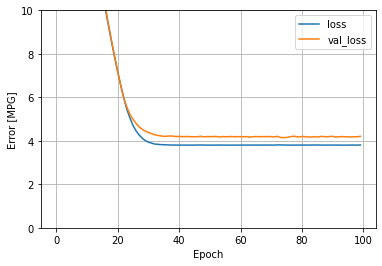

In [ ]:
plot_loss(history)

Making a list to store accuracies of different model. Storing horsepower model acc in list

In [ ]:
test_result  ={}
test_result['Horsepower'] = horsepower_model.evaluate(test_features['Horsepower'], test_labels, verbose=0)

In [ ]:
print(test_result)

{'Horsepower': 3.6340324878692627}


In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)
print(y)

[[40.487]
 [40.317]
 [40.146]
 [39.976]
 [39.805]
 [39.635]
 [39.464]
 [39.293]
 [39.123]
 [38.952]
 [38.782]
 [38.611]
 [38.441]
 [38.27 ]
 [38.1  ]
 [37.929]
 [37.759]
 [37.588]
 [37.418]
 [37.247]
 [37.076]
 [36.906]
 [36.735]
 [36.565]
 [36.394]
 [36.224]
 [36.053]
 [35.883]
 [35.712]
 [35.542]
 [35.371]
 [35.201]
 [35.03 ]
 [34.859]
 [34.689]
 [34.518]
 [34.348]
 [34.177]
 [34.007]
 [33.836]
 [33.666]
 [33.495]
 [33.325]
 [33.154]
 [32.983]
 [32.813]
 [32.642]
 [32.472]
 [32.301]
 [32.131]
 [31.96 ]
 [31.79 ]
 [31.619]
 [31.449]
 [31.278]
 [31.108]
 [30.937]
 [30.766]
 [30.596]
 [30.425]
 [30.255]
 [30.084]
 [29.914]
 [29.743]
 [29.573]
 [29.402]
 [29.232]
 [29.061]
 [28.891]
 [28.72 ]
 [28.549]
 [28.379]
 [28.208]
 [28.038]
 [27.867]
 [27.697]
 [27.526]
 [27.356]
 [27.185]
 [27.015]
 [26.844]
 [26.674]
 [26.503]
 [26.332]
 [26.162]
 [25.991]
 [25.821]
 [25.65 ]
 [25.48 ]
 [25.309]
 [25.139]
 [24.968]
 [24.798]
 [24.627]
 [24.457]
 [24.286]
 [24.115]
 [23.945]
 [23.774]
 [23.604]


In [ ]:
print(len(y))

251


Plotting horsepower feature data against predcition line

In [ ]:
def plot_horsepower(x,y):
  plt.scatter(train_features['Horsepower'], train_labels, label = 'Data')
  plt.plot(x,y, color = 'k', label = 'Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

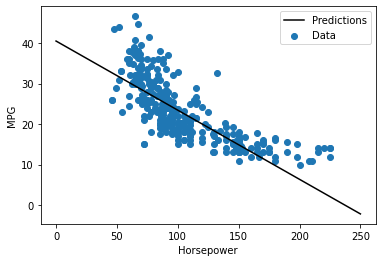

In [ ]:
plot_horsepower(x,y)

Defining a linear model with normalizer on all feature of train dataset and with one dense layer with one unit

In [ ]:
linear_model = tf.keras.models.Sequential([
                                           normalizer,
                                           layers.Dense(1)
])

Predicting without training model

In [ ]:
linear_model.predict(train_features[:10])

array([[-0.72 ],
       [-0.201],
       [-1.063],
       [-0.272],
       [ 1.421],
       [ 0.395],
       [ 1.713],
       [ 2.05 ],
       [-0.079],
       [ 1.161]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.145],
       [ 0.703],
       [-0.561],
       [-0.339],
       [ 0.599],
       [ 0.058],
       [-0.151],
       [-0.128],
       [-0.706]], dtype=float32)>

Compiling linear model with Adam optimizer and mean absolute error and fitting on train data

In [38]:
linear_model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.1), loss = 'mean_absolute_error')

In [41]:
%%time

history1 = linear_model.fit(train_features, train_labels, epochs= 100, verbose=0, validation_split= 0.2)

CPU times: user 8.79 s, sys: 180 ms, total: 8.97 s
Wall time: 8.68 s


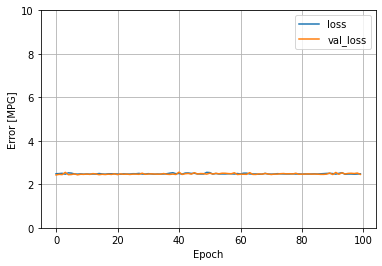

In [42]:
plot_loss(history1)

Appending the results of linear model in test_result list

In [43]:
test_result['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose= 0)

Defining a function for building a sequential model and compiling that model using Adam optimizer and mean absolute error

In [50]:
def build_and_compile_model(norm):
  model = tf.keras.models.Sequential([
                                     norm,
                                     layers.Dense(64, activation= 'relu'),
                                     layers.Dense(64, activation='relu'),
                                     layers.Dense(1)
  ])

  model.compile(optimizer= tf.keras.optimizers.Adam(0.001), loss=  'mean_absolute_error')
  return model

Defining dnn_horsepower_model using function which we defined earlier and only horsepower feature

In [51]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [52]:
dnn_horsepower_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Fitting dnn_horse power model

In [53]:
%%time
history2 = dnn_horsepower_model.fit(train_features['Horsepower'], train_labels, epochs=100, verbose=0,
                                    validation_split = 0.2)

CPU times: user 9.14 s, sys: 194 ms, total: 9.34 s
Wall time: 8.91 s


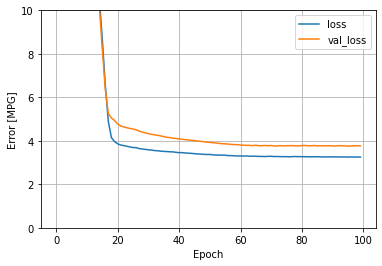

In [54]:
plot_loss(history2)

In [55]:
x = tf.linspace(0.0, 250,251)
y = dnn_horsepower_model.predict(x)

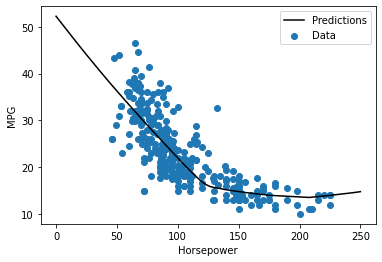

In [57]:
plot_horsepower(x,y)

Appending the results in the test results list

In [58]:
test_result['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(test_features['Horsepower'], test_labels, verbose = 0)

Defining dnn_model using function we built earlier and all the features of train dataset

In [59]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense_8 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


Fitting that model

In [60]:
%%time
history3 = dnn_model.fit(train_features, train_labels,validation_split= 0.2, verbose=0, epochs=100)

CPU times: user 9.22 s, sys: 195 ms, total: 9.42 s
Wall time: 8.96 s


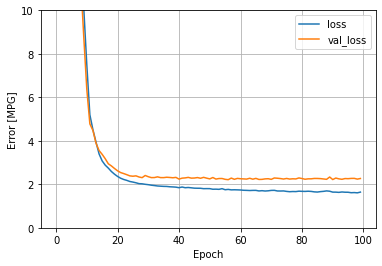

In [61]:
plot_loss(history3)

Appending the results of dnn_model in test results list

In [62]:
test_result['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

Getting a DataFrame of mean absolute errors of all the models from test results list

In [63]:
pd.DataFrame(test_result, index = ['Mean Absolute Error [MPG]']).T

,Mean Absolute Error [MPG]
Horsepower,3.634032
linear_model,2.505109
dnn_horsepower_model,2.915998
dnn_model,1.695843


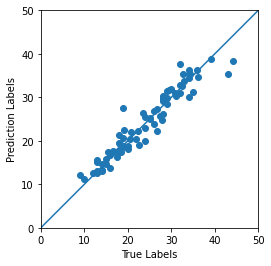

In [65]:
test_predictions = dnn_model.predict(test_features).flatten()


a = plt.axes(aspect = 'equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Labels')
plt.ylabel('Prediction Labels')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

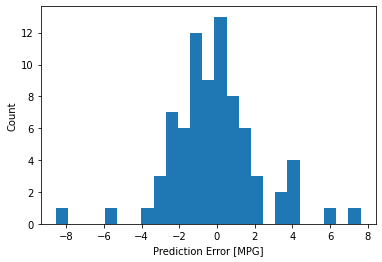

In [66]:
error = test_labels - test_predictions
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

Saving the dnn_model because it gave us good results instead of others

In [67]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


Reloading that model again to check that whether the result remain same

In [68]:
reloader = tf.keras.models.load_model('dnn_model')

In [69]:
test_result['reloader'] = reloader.evaluate(test_features, test_labels, verbose = 0)

Here you can see both dnn_model and model that we reload giving the same results mean it saved model correctly.

In [71]:
pd.DataFrame(test_result, index = ['Mean Absolute Error [MPG]'])

,Horsepower,linear_model,dnn_horsepower_model,dnn_model,reloader
Mean Absolute Error [MPG],3.634032,2.505109,2.915998,1.695843,1.695843
